<a href="https://colab.research.google.com/github/RonaldManoelScientist/Detectar_Fraudes_Bancarias/blob/main/%5BCompleto%5D_Detec%C3%A7%C3%A3o_de_Fraude_Cart%C3%A3o_de_Credito_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes no Cartão de Crédito
É Muito importante que empresas que prestam serviços de crédito consigam identificar fraudes nas transações pois o mesmo pode significar prejuizos irreparáveis, levando na pior da hipóteses à falência. Por esse motivo empresas deste setor acabam que investem um quantia relativamente alta em modelos que buscam melhorar a previsão de uma fraude através de comportamentos do usuário.

Na análise a seguir será utilizado um dataset de um banco Europeu não descrito, e contendo alguns dados ocultados para a segurança dos clientes.

o método de ocultação desses dados se chama ***PCA Transformation.***



> O Dataset contem transações feitas em Setembro de 2013, e a coleta foi realizada em dois dias.
A principio o dataset estar bastante desbalanceado podendo prejudicar a performance do modelo, o chamado ***Overfitting*** (Onde o modelo considera as altas varianças dos dados)


## Importação de Bibliotecas e Análise Exploratória


*   Verificar todas as Variáveis do dataset
*   Observar a distribuição das Variáveis



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import plot_confusion_matrix as skplt
df = pd.read_csv('/content/drive/MyDrive/DataSet/Cartão de Crédito/creditcard.csv') 

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Abaixo temos as dimensões do dataset

In [18]:
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

Entradas: 284807
Variáveis: 31


Vamos obsevar as 31 Variáveis para entender o contexto geral

In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

> A Maioria dos dados possui um Dtype `float64` a única variável que não possui é a Variável ***Class***

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> Como podemos ver na distribuição abaixo temos um dataset bem desbalanceado, já mencionado acima sendo assim podendo sofrer Overfitting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


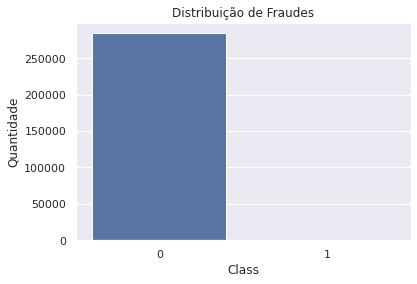

In [21]:
sns.countplot("Class", data=df)
plt.title('Distribuição de Fraudes')
plt.ylabel('Quantidade')
plt.xlabel('Class')

plt.tight_layout;

> Abaixo vamos através de um plano correlacionar duas Variáveis, `Class` e `Time`, se houver algum padrão que indique uma fraude será bastante eficiente

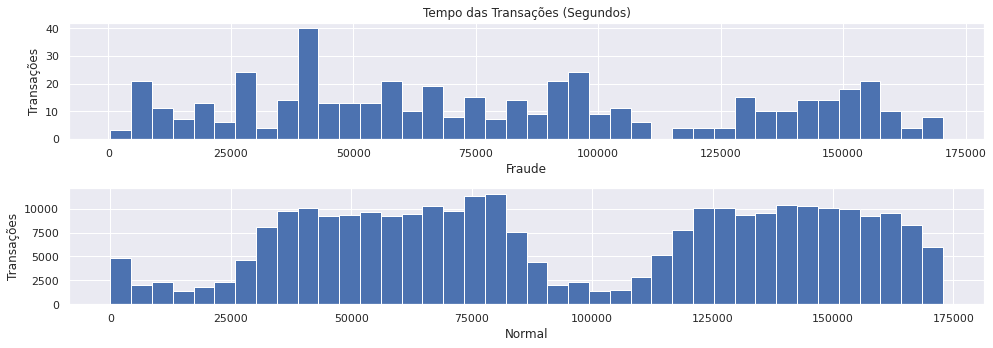

In [22]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize=(14, 5))
sns.set()
bins = 40

ax[0].hist(df.Time[df['Class'] == 1], bins = bins)
ax[0].set_title('Tempo das Transações (Segundos)')
ax[0].set_xlabel('Fraude')

ax[0].set_ylabel('Transações')
ax[1].hist(df.Time[df['Class'] == 0], bins = bins)
ax[1].set_xlabel('Normal')

ax[1].set_ylabel('Transações')
plt.tight_layout();

Nada muito animador, não é possivel concluir algo com a análise dessa correlação

## Análises mais acertivas
O Objetivo aqui é encontrar algum padrão que indique que temos um fraude, e antes de irmos para as variáveis que sofreram a transformação PCA, iremos analisar com o Boxplot os montantes movimentados


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


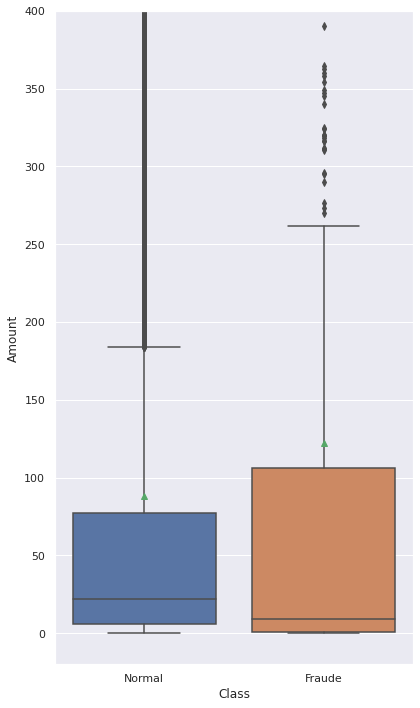

In [23]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

Podemos observar que o montante nas fraudes costumar ser maior do que nas transações normais...

### Com a Análise Estartística:
 Com o método `describe()` podemos ver que realmente não tem padrões nos quartiles percentuais...

In [24]:
df[(df.Class==1) & (df.Amount < 1000)]['Amount'].describe()

count    483.000000
mean      97.082070
std      175.731723
min        0.000000
25%        1.000000
50%        8.540000
75%      100.745000
max      996.270000
Name: Amount, dtype: float64

## Distribuição dos Clientes

* Podemos observar de maneira gráfica as distribuições 
* Novamente tentar observar um padrão gráfico nos transações fraudelentas

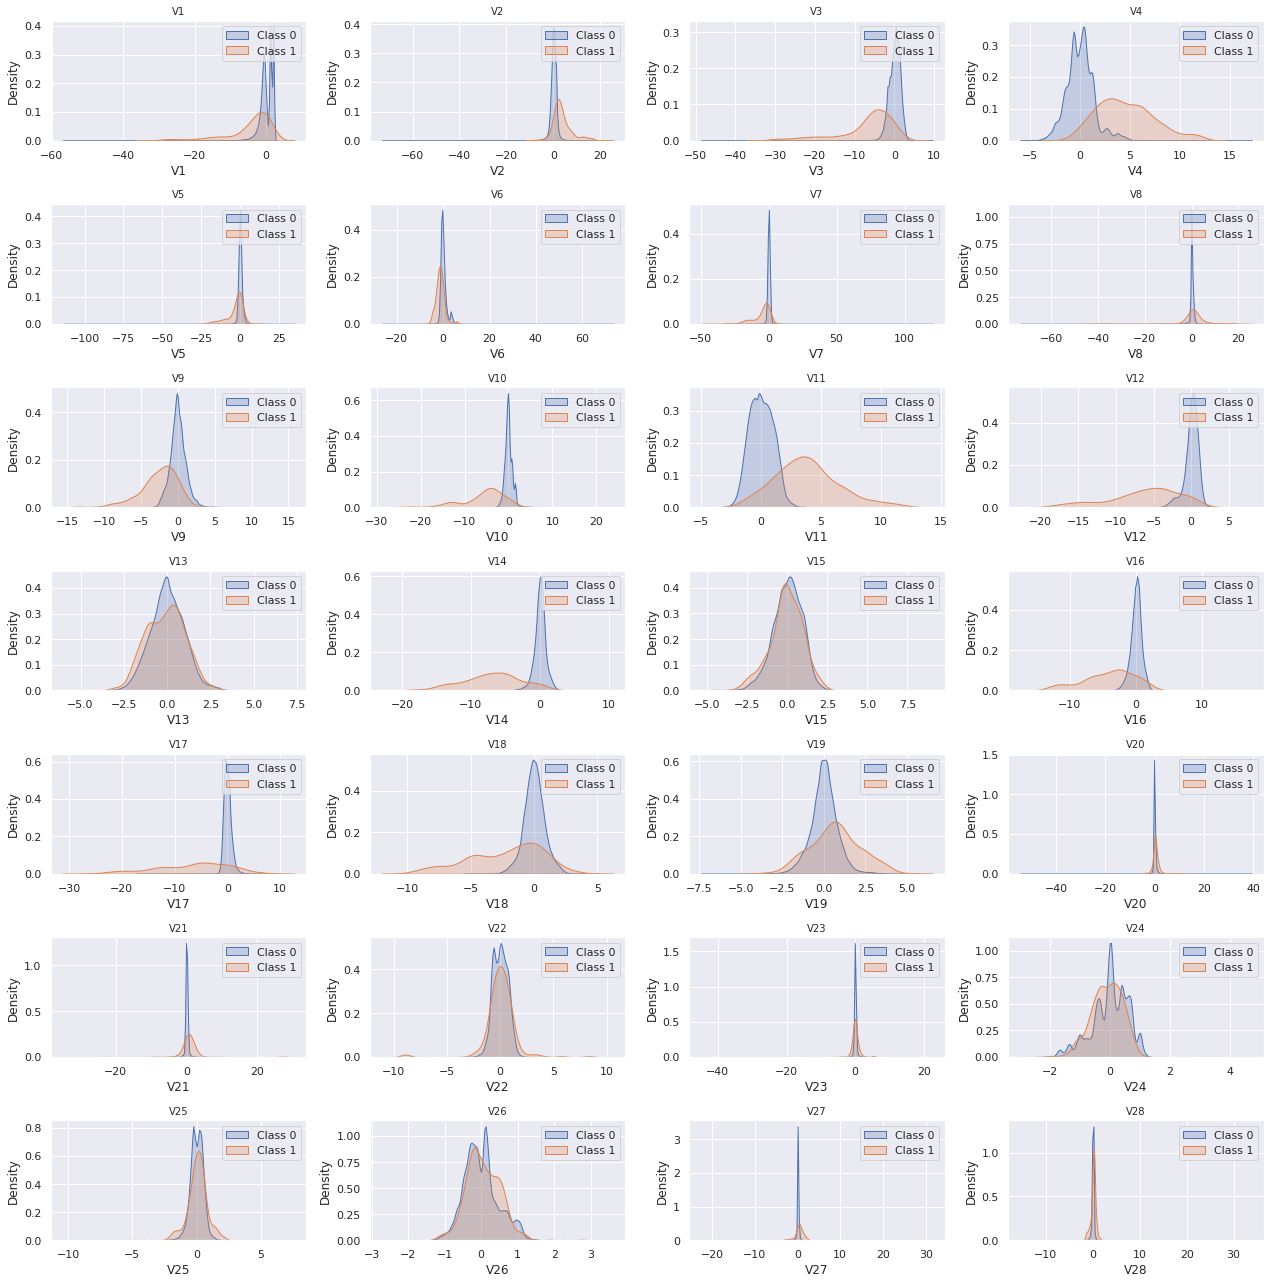

In [25]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
    plt.legend(loc = 'best')  
plt.tight_layout()

> Como podemos observar `V13`, `V15`, `V22` , `V25`, `V24` são comportamentos bem similares, podendo assumir alguns erros na previsão de resultados




# Montagem do Modelo de Previsão
O Método de previsão escolhido  foi a de Regressão logistica, pois temos nesse dataset uma variável chamada `Class` que contém os resultados positivos e negativos para fraude

> Vamos no passo a baixo padronizar os dados

In [32]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [33]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

0    369
1    369
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


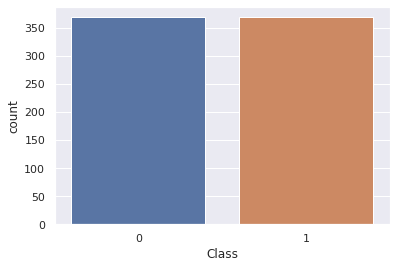

In [34]:
# usar técnica under-sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

> Após a padronização temos duas colunas novas `std_amount`, `std_time` e deletamos as antigas `Time`, `Amount`, padronizamos para evitar um possível overfitting

podemos verificar que já não existe o desbalanceamento

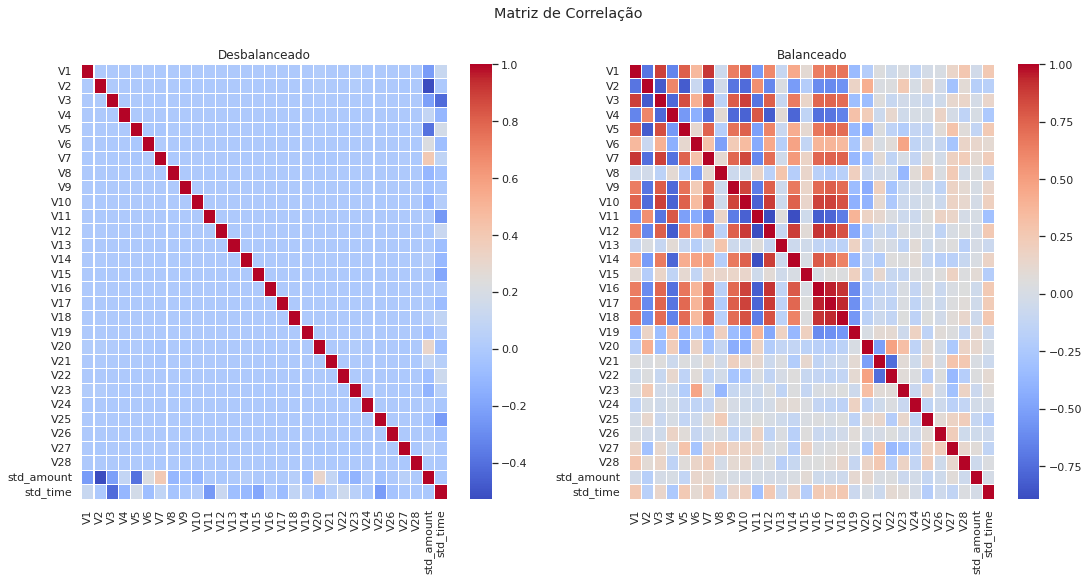

In [35]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

In [36]:
# instanciar e treinar um modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

> Abaixo temos um relatório com desempenho do modelo

In [37]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9684    0.9839     71079
           1     0.0486    0.9350    0.0925       123

    accuracy                         0.9683     71202
   macro avg     0.5243    0.9517    0.5382     71202
weighted avg     0.9982    0.9683    0.9823     71202

Acurácia: 0.9683

AUC: 0.9517



Os Resultados obtiveram uma boa acurácia e também uma boa precisão como pode se analisar no relatório